# Cognitive Age Prediction with MEG

In [1]:
import mne
import numpy as np
import pandas as pd

from camcan.utils import (plot_pred, plot_learning_curve,
                          plot_barchart, run_meg_ridge,
                          plot_error_age, plot_error_segments,
                          plot_boxplot, run_stacking)

%matplotlib inline

/home/okozynet/miniconda3/envs/mne/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/okozynet/miniconda3/envs/mne/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/okozynet/miniconda3/envs/mne/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
CV = 10
# store mae, std for the summary plot
meg_mae = {}
meg_mae_std = {}
meg_pred_diff = {}

## Read Data

In [3]:
subjects_data = pd.read_csv('../../data/participant_data.csv', index_col=0)
subjects_predictions = pd.DataFrame(subjects_data.age, index=subjects_data.index, dtype=float)
subjects_data.head()

,age,hand,gender_text,gender_code,tiv_cubicmm,cbuid700,cbuid280_sess1,cbuid280_sess2,cbuid280_sess3,cbuid280_sess4,profilecode,profilecode_numeric
Observations,,,,,,,,,,,,
CC110033,24,90.0,MALE,1,1413746.0,CBU120746,NaN,NaN,NaN,NaN,NaN,NaN
CC110037,18,89.0,MALE,1,1386581.0,CBU110544,NaN,NaN,NaN,NaN,NaN,NaN
CC110045,24,100.0,FEMALE,2,1385355.0,CBU111116,NaN,NaN,NaN,NaN,NaN,NaN
CC110056,22,100.0,FEMALE,2,1286849.0,CBU110547,NaN,CBU140153,CBU140224,NaN,D,1.0
CC110062,20,58.0,MALE,1,1582719.0,CBU110468,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 643 subjects, each covariance is 9x306x306
meg_data = mne.externals.h5io.read_hdf5('../../data/covs_allch_oas.h5')

print(f'Found {len(meg_data)} subjects')
print(f'A covarince matrix shape is {meg_data[0]["covs"].shape}')

Found 643 subjects
A covarince matrix shape is (9, 306, 306)


## SPoC and Age Prediction

In [5]:
FREQ_BANDS = [(0.1, 1.5),  # low
              (1.5, 4.0),  # delta
              (4.0, 8.0),  # theta
              (8.0, 15.0),  # alpha
              (15.0, 26.0),  # beta_low
              (26.0, 35.0),  # beta_high
              (35.0, 50.0),  # gamma_low
              (50.0, 74.0),  # gamma_mid
              (76.0, 120.0)]  # gamma_high

MAE: 9.22
MAE STD: 0.53


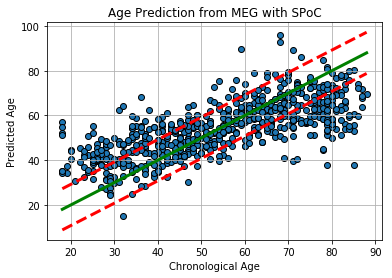

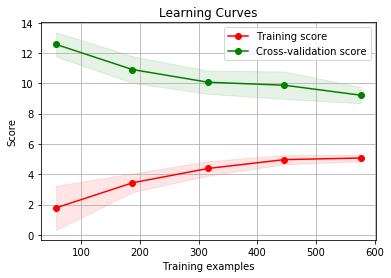

In [16]:
df_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores = \
    run_meg_ridge(meg_data, subjects_data, alphas=np.logspace(-3, 5, 100), cv=CV, fbands=FREQ_BANDS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

meg_mae['MEG'] = arr_mae
meg_mae_std['MEG'] = (mae, std)
subjects_predictions.loc[df_pred.index, 'MEG'] = df_pred[0]

plot_pred(subjects_predictions.loc[df_pred.index].age,
          subjects_predictions.loc[df_pred.index, 'MEG'],
          mae, title='Age Prediction from MEG with SPoC')
plot_learning_curve(train_sizes, train_scores, test_scores)

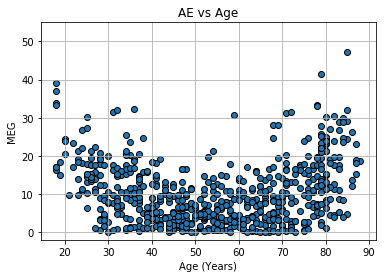

In [19]:
plot_error_age(subjects_predictions, ylim=(-2, 55))

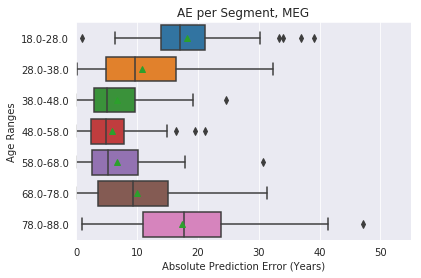

In [20]:
plot_error_segments(subjects_predictions, segment_len=10)

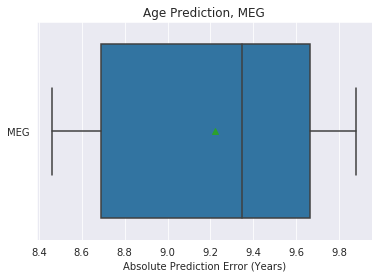

In [21]:
plot_boxplot(meg_mae, title='Age Prediction, MEG')

Results from the draft MAE : 8.878 (0.721)